In [1]:
import os
import sys
from torchvision.datasets import Cityscapes
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as F
from cityscapes_helper import CitySpaceseDataset

In [2]:
current_dir = os.getcwd()
print(f"Current Directory: {current_dir}")
data_dir = os.path.join(current_dir,'data\CityScapes')
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
    os.mkdir(os.path.join(data_dir,'leftImg8bit'))
    os.mkdir(os.path.join(data_dir,'gtFine'))

Current Directory: C:\Users\Dhruv\Documents\Github\EE641\EE641-Project


torch.Size([3, 256, 512]) torch.Size([256, 512])
//*********************************************//
Mask Histogram
Label: Frequency
{0: 16443, 1: 39015, 2: 14120, 3: 16421, 4: 191, 5: 3085, 6: 2037, 7: 0, 8: 84, 9: 19600, 10: 0, 11: 6710, 12: 1071, 13: 581, 14: 10908, 15: 380, 16: 0, 17: 0, 18: 0, 19: 426, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0}


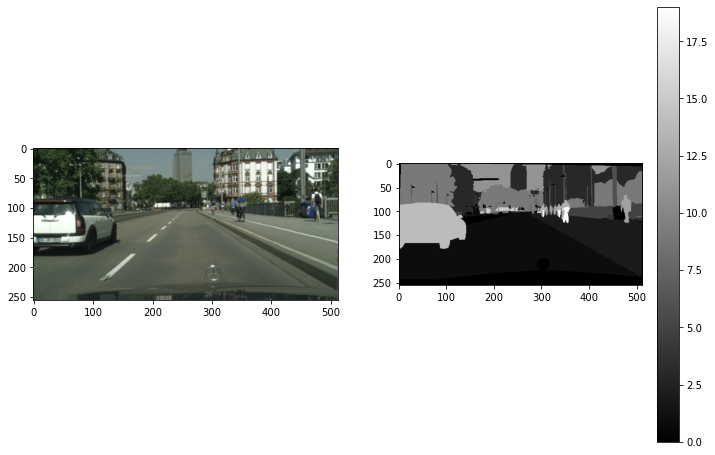

In [3]:
dataset = CitySpaceseDataset(data_dir, split='val', mode='fine',
                     target_type='semantic')
img,seg= dataset[20]
print(img.shape,seg.shape)

fig,ax=plt.subplots(ncols=2,figsize=(12,8))
ax[0].imshow(img.permute(1, 2, 0))
pos = ax[1].imshow(seg,cmap='gray')
fig.colorbar(pos, ax=ax[1])

print("//*********************************************//")
print("Mask Histogram")
print("Label: Frequency")
histogram, bin_edges = np.histogram(seg, bins=np.arange(0,256))
freq = {label:freq for label,freq in zip(bin_edges[0:31],histogram[0:31])}
print(freq)



class GTA5(torchDataset):
    def __init__(self, root):
        self.root = root
        self.IMG_DIR_NAME = "images"
        self.LBL_DIR_NAME = "labels"
        self.SUFFIX = ".png"
        self.img_paths = self.create_imgpath_list()
        self.lbl_paths = self.create_lblpath_list()
        GTA5labels = GTA5Labels()
        self.label_map = GTA5labels.support_id_list()

    def create_imgpath_list(self):
        img_dir = os.path.join(self.root,self.IMG_DIR_NAME)
        img_path = [path for path in glob.glob(f"{img_dir}/*{self.SUFFIX}")]
        return img_path

    def create_lblpath_list(self):
        lbl_dir = os.path.join(self.root,self.LBL_DIR_NAME)
        lbl_path = [path for path in glob.glob(f"{lbl_dir}/*{self.SUFFIX}")]
        return lbl_path
    
    def __len__(self):
        return len(self.img_paths)
    def __getitem__(self, idx, isPath=False):
        img_path, lbl_path = self.img_paths[idx], self.lbl_paths[idx]
        if isPath:
            return img_path, lbl_path

        img = self.read_img(img_path)
        lbl = self.read_img(lbl_path)
        return img, lbl
    def read_img(self, path):
        img = Image.open(str(path))
        img = np.array(img)
        return img
    def decode(self, cls, lbl):
        return cls._decode(lbl, label_map=cls.label_map.list_)
    def _decode(self, lbl, label_map):
        color_lbl = np.zeros((*lbl.shape, 3))
        for label in label_map:
            color_lbl[lbl == label.ID] = label.color
        return color_lbl

In [4]:
import glob
from torch.utils.data import Dataset as torchDataset
from gtaV_helper import GTA5

current_dir = os.getcwd()
data_dir = os.path.join(current_dir,'data\GTA5')


(1052, 1914, 3) (1052, 1914)
//*********************************************//
Mask Histogram
Label: Frequency
{0: 9862, 1: 257628, 2: 0, 3: 0, 4: 0, 5: 8127, 6: 2972, 7: 785640, 8: 69973, 9: 0, 10: 0, 11: 676446, 12: 3558, 13: 48, 14: 0, 15: 0, 16: 0, 17: 19934, 18: 0, 19: 3688, 20: 0, 21: 78959, 22: 11999, 23: 52314, 24: 2250, 25: 0, 26: 29547, 27: 0, 28: 581, 29: 0, 30: 0}


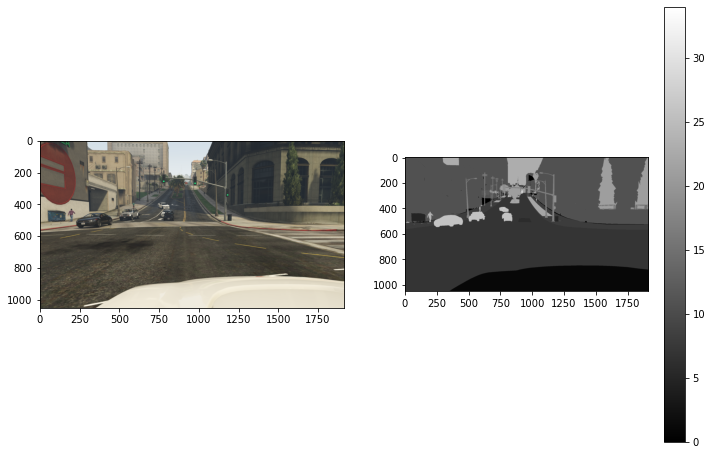

In [5]:
dataset=GTA5(data_dir)
img,seg= dataset[20]
print(img.shape,seg.shape)

fig,ax=plt.subplots(ncols=2,figsize=(12,8))
ax[0].imshow(img)
pos = ax[1].imshow(seg,cmap='gray')
fig.colorbar(pos, ax=ax[1])

print("//*********************************************//")
print("Mask Histogram")
print("Label: Frequency")
histogram, bin_edges = np.histogram(seg, bins=np.arange(0,256))
freq = {label:freq for label,freq in zip(bin_edges[0:31],histogram[0:31])}
print(freq)